# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

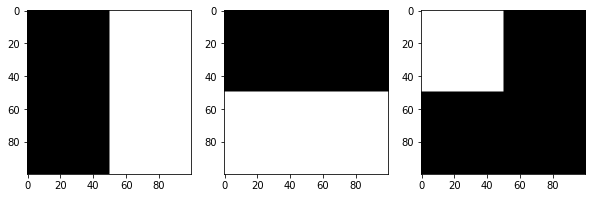

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


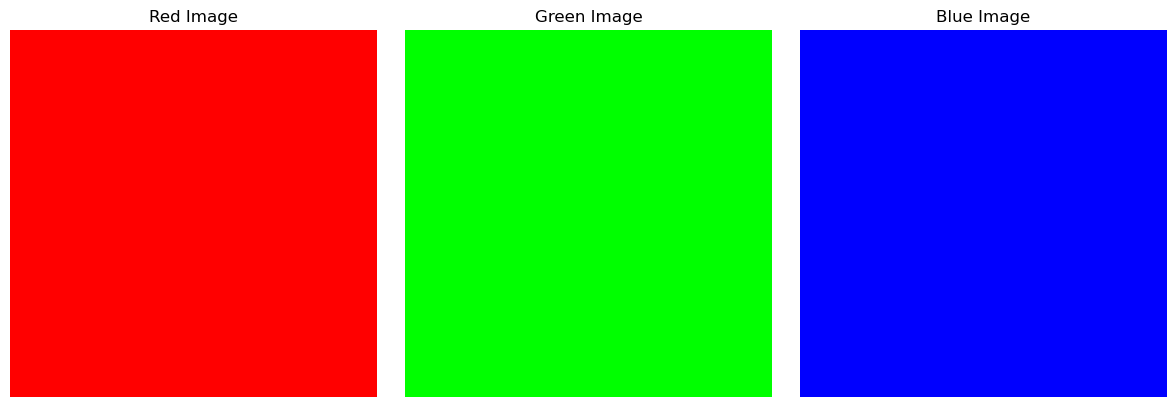

In [9]:
# solution
# Creating three 100x100 images with different color manipulations
image_red = np.zeros((100, 100, 3), dtype=np.uint8)  # Initialize black image
image_red[:, :, 0] = 255  # Set Red channel to max

image_green = np.zeros((100, 100, 3), dtype=np.uint8)
image_green[:, :, 1] = 255  # Set Green channel to max

image_blue = np.zeros((100, 100, 3), dtype=np.uint8)
image_blue[:, :, 2] = 255  # Set Blue channel to max

# Displaying images in a 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(image_red)
axes[0].set_title('Red Image')
axes[0].axis('off')

axes[1].imshow(image_green)
axes[1].set_title('Green Image')
axes[1].axis('off')

axes[2].imshow(image_blue)
axes[2].set_title('Blue Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

*   Use the above three images to create the following image

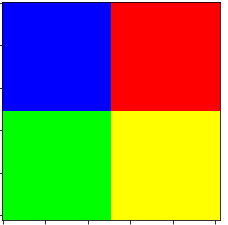
*Hint: Remember channels and color spaces*

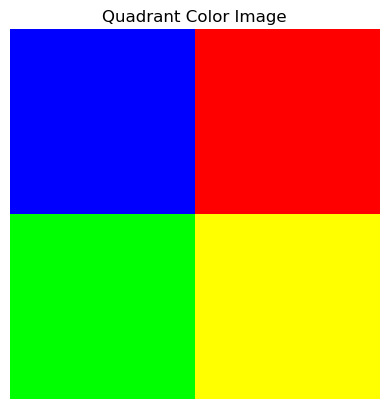

In [11]:
# solution
# Create a 100x100 image with 3 channels (RGB)
final_image = np.zeros((100, 100, 3), dtype=np.uint8)

# Define quadrant size
half_size = 50

# Assign colors to quadrants
final_image[:half_size, :half_size] = [0, 0, 255]  # Top-left: Blue
final_image[:half_size, half_size:] = [255, 0, 0]  # Top-right: Red
final_image[half_size:, :half_size] = [0, 255, 0]  # Bottom-left: Green
final_image[half_size:, half_size:] = [255, 255, 0]  # Bottom-right: Yellow (Red + Green)

# Display the image
plt.imshow(final_image)
plt.axis('off')
plt.title('Quadrant Color Image')
plt.show()


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

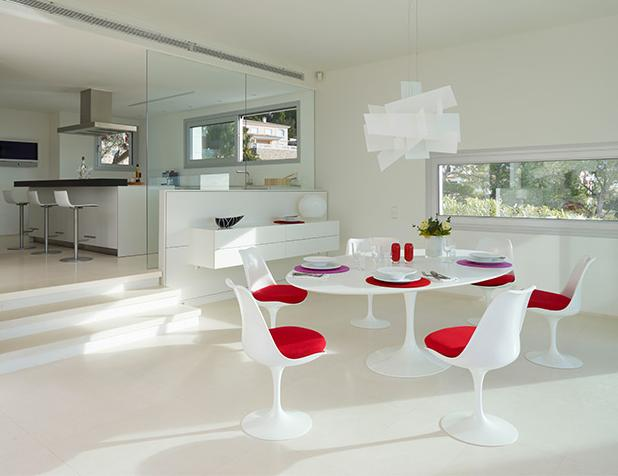

*   Extract individual channels and plot them using matplotlib subplot.



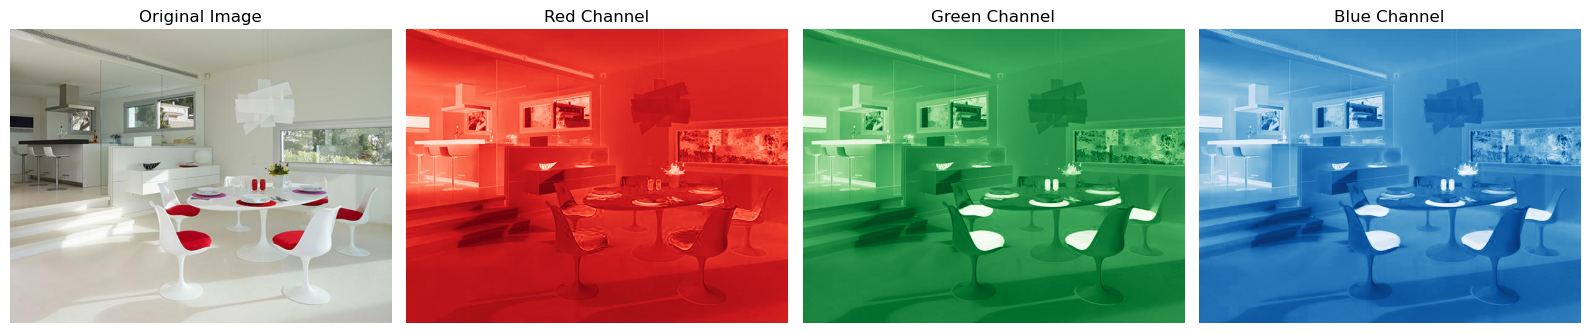

In [15]:
# solution
# Read the image
image_path = "sillas.jpg"  
image = io.imread(image_path)

# Extract color channels
red_channel = image[:, :, 0]  # Red
green_channel = image[:, :, 1]  # Green
blue_channel = image[:, :, 2]  # Blue

# Create a 1x4 subplot to display original + channels
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Show Original Image
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Show Red Channel
axes[1].imshow(red_channel, cmap="Reds")
axes[1].set_title("Red Channel")
axes[1].axis("off")

# Show Green Channel
axes[2].imshow(green_channel, cmap="Greens")
axes[2].set_title("Green Channel")
axes[2].axis("off")

# Show Blue Channel
axes[3].imshow(blue_channel, cmap="Blues")
axes[3].set_title("Blue Channel")
axes[3].axis("off")

plt.tight_layout()
plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

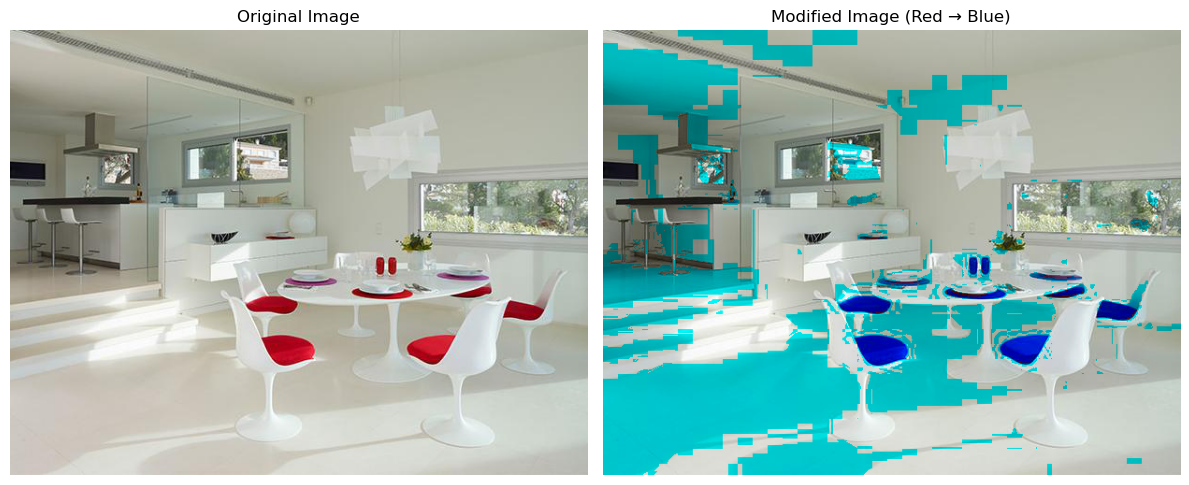

In [17]:
# solution
# Create a copy of the image to modify
modified_image = image.copy()

# Define threshold for detecting 'red' areas
red_threshold = 100  # Adjust if needed

# Condition to find red pixels (Red is dominant over Green & Blue)
red_pixels = (image[:, :, 0] > red_threshold) & (image[:, :, 0] > image[:, :, 1]) & (image[:, :, 0] > image[:, :, 2])

# Swap red with blue
modified_image[red_pixels, 2] = image[red_pixels, 0]  # Set Blue = Red
modified_image[red_pixels, 0] = 0  # Remove Red component

# Display Original and Modified Images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(modified_image)
axes[1].set_title("Modified Image (Red → Blue)")
axes[1].axis("off")

plt.tight_layout()
plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

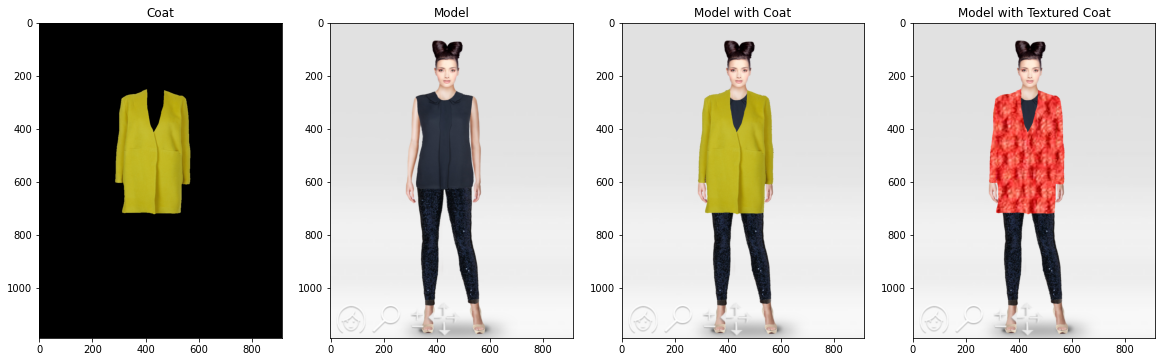

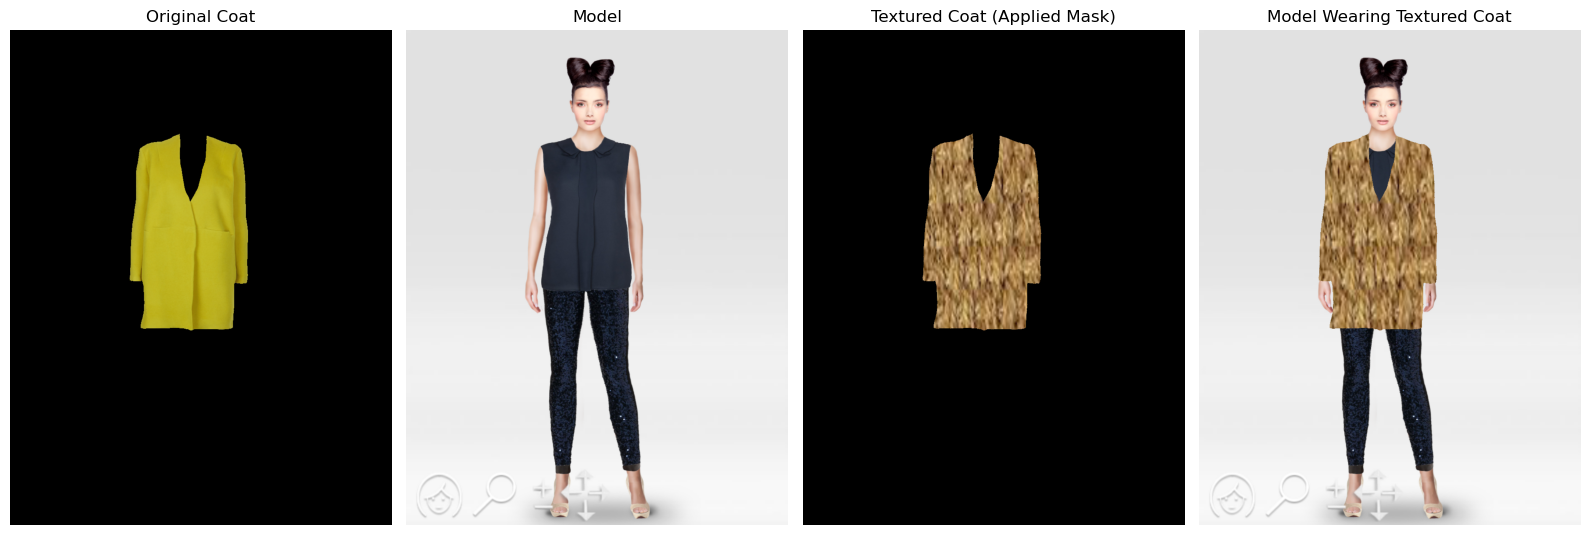

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform, img_as_ubyte

# Load Images
model = io.imread("model.png")
coat = io.imread("coat.png")  
texture = io.imread("texture.png") 

# Remove Alpha Channel (If Present)
if coat.shape[2] == 4:
    coat = coat[:, :, :3]  # Convert RGBA to RGB

# Create a Binary Mask for the Coat (Black Background Ignored)
coat_gray = color.rgb2gray(coat)  
coat_mask = coat_gray > 0  # Mask for coat (True for coat, False for black background)

# Resize Texture to Match Coat Dimensions
texture_resized = transform.resize(texture, (coat.shape[0], coat.shape[1], 3), anti_aliasing=True)
texture_resized = img_as_ubyte(texture_resized)  # Convert to 8-bit format

# Apply Mask to Replace Coat with Texture
textured_coat = np.zeros_like(coat)
for i in range(3):  # Loop over RGB channels
    textured_coat[:, :, i] = np.where(
        coat_mask,
        texture_resized[:, :, i],  # Apply texture inside coat area
        0  # Keep black background untouched
    )
    
# Overlay the Textured Coat onto the Model
model_with_textured_coat = model.copy()
for i in range(3):  
    model_with_textured_coat[:, :, i][coat_mask] = textured_coat[:, :, i][coat_mask]  # Apply coat to model

# Display the Result
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

axes[0].imshow(coat)
axes[0].set_title("Original Coat")
axes[0].axis("off")

axes[1].imshow(model)
axes[1].set_title("Model")
axes[1].axis("off")

axes[2].imshow(textured_coat)
axes[2].set_title("Textured Coat (Applied Mask)")
axes[2].axis("off")

axes[3].imshow(model_with_textured_coat)
axes[3].set_title("Model Wearing Textured Coat")
axes[3].axis("off")

plt.tight_layout()
plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




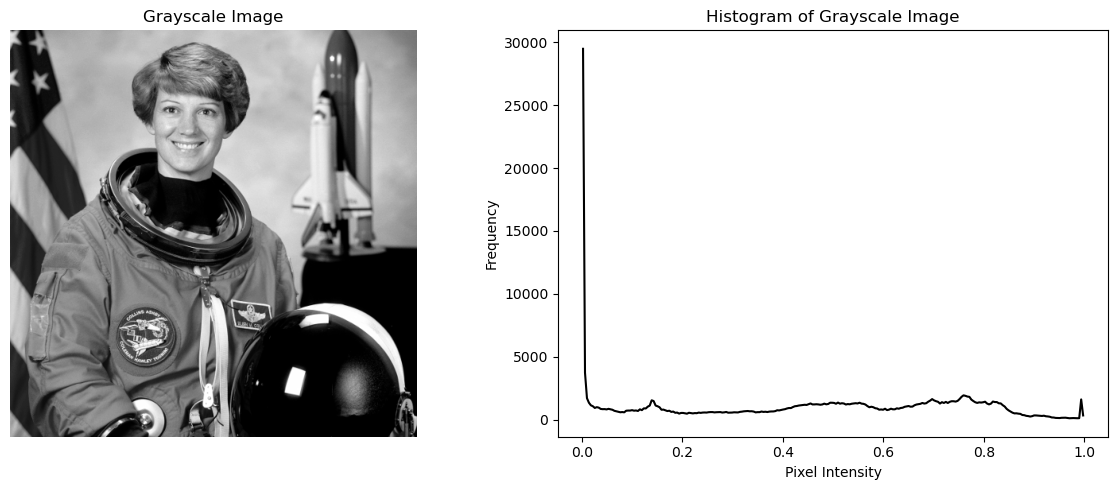

In [99]:
# solution
from skimage import data, color, exposure

# Load the Astronaut Image
image = data.astronaut()  # Load the astronaut image from skimage
gray_image = color.rgb2gray(image)  # Convert to grayscale

# Compute the Histogram
hist, bins = exposure.histogram(gray_image)  # Compute histogram

# Plot the Image and Histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Show grayscale image
axes[0].imshow(gray_image, cmap="gray")
axes[0].set_title("Grayscale Image")
axes[0].axis("off")

# Show histogram
axes[1].plot(bins, hist, color="black")
axes[1].set_title("Histogram of Grayscale Image")
axes[1].set_xlabel("Pixel Intensity")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

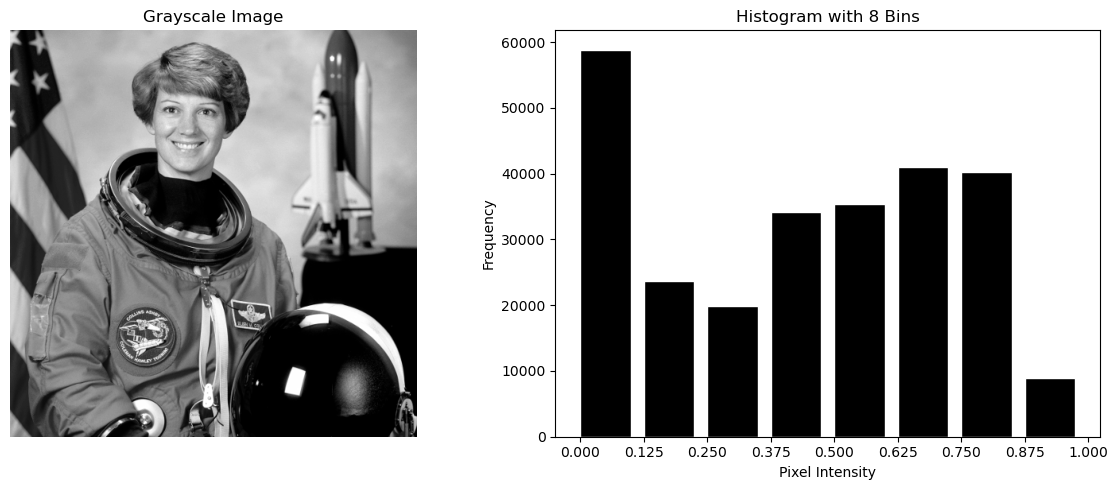

In [101]:
# solution
# Compute the Histogram with 8 Bins
hist, bin_edges = np.histogram(gray_image, bins=8, range=(0, 1))  # 8 bins, range 0-1

# Plot the Image and 8-Bin Histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Show grayscale image
axes[0].imshow(gray_image, cmap="gray")
axes[0].set_title("Grayscale Image")
axes[0].axis("off")

# Show histogram (bar chart for better visualization)
axes[1].bar(bin_edges[:-1], hist, width=0.1, color="black", edgecolor="white", align="edge")
axes[1].set_title("Histogram with 8 Bins")
axes[1].set_xlabel("Pixel Intensity")
axes[1].set_ylabel("Frequency")
axes[1].set_xticks(bin_edges)  # Show bin edges on x-axis

plt.tight_layout()
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



Yes, inference changes!

A low bin count gives a broad overview but may miss important details.
A high bin count gives precise contrast information but may introduce noise.
The correct bin count depends on what level of detail you need.